In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv(r'E:\Diamond price prediction\notebook\data\gemstone.csv')

In [3]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [4]:
df.describe()

,id,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,96786.000000,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,55879.856166,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.000000,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,48393.000000,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,96786.000000,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,145179.000000,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,193572.000000,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [5]:
df.columns

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price'],
      dtype='object')

In [6]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [8]:
df.drop(columns='id',inplace=True)

In [9]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [10]:
df.duplicated().sum()

0

In [11]:
df['color'].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [12]:
df['clarity'].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [13]:
df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [14]:
numerical_columns = df.columns[df.dtypes!='object']
categorical_columns = df.columns[df.dtypes=='object']

In [15]:
df[categorical_columns].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [16]:
df['cut'].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [17]:
df['color'].value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

In [18]:
df['clarity'].value_counts()

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

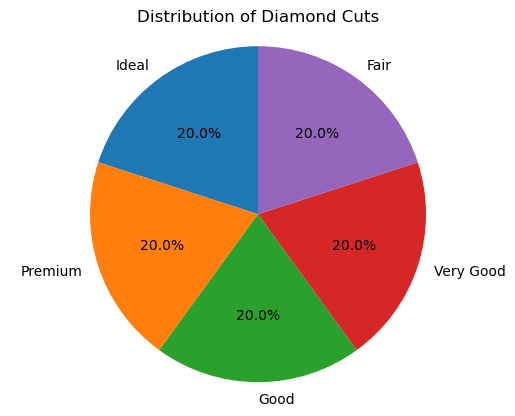

In [19]:
# taken help *********************************
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame and 'cut' is a column in it
# Example data, replace it with your actual DataFrame and column
data = {'cut': ['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']}
pie_df = pd.DataFrame(data)

# Count the occurrences of each category in the 'cut' column
cut_counts = pie_df['cut'].value_counts()

# Plotting the pie chart
plt.pie(cut_counts, labels=cut_counts.index, autopct='%1.1f%%', startangle=90)

# Equal aspect ratio ensures that the pie is drawn as a circle.
plt.axis('equal')

# Adding a title
plt.title('Distribution of Diamond Cuts')

# Display the plot
plt.show()


<Axes: xlabel='cut', ylabel='Count'>

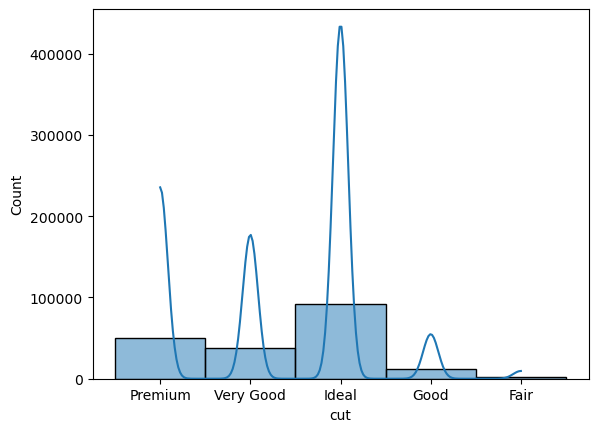

In [20]:
sns.histplot(df['cut'],kde=True)

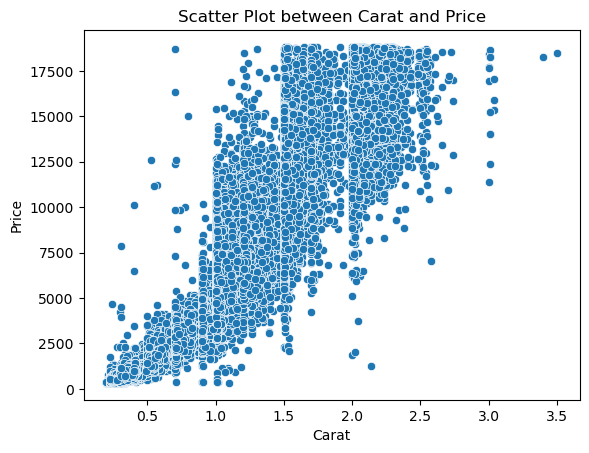

In [21]:
#scatterplot
sns.scatterplot(x='carat', y='price', data=df)
plt.title('Scatter Plot between Carat and Price')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()



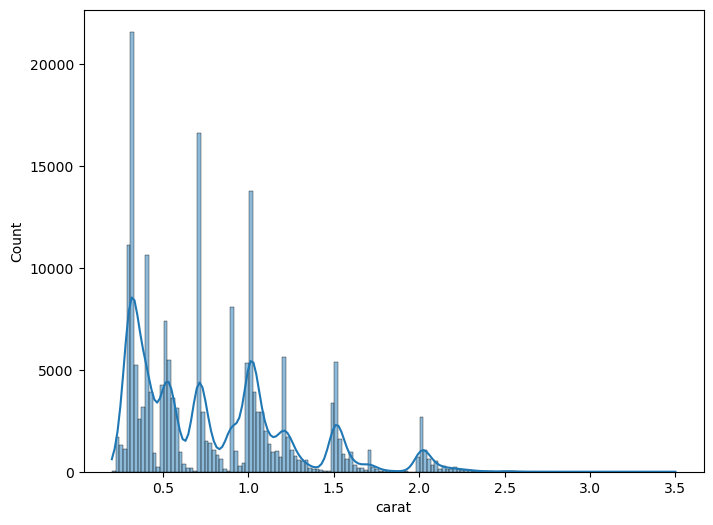

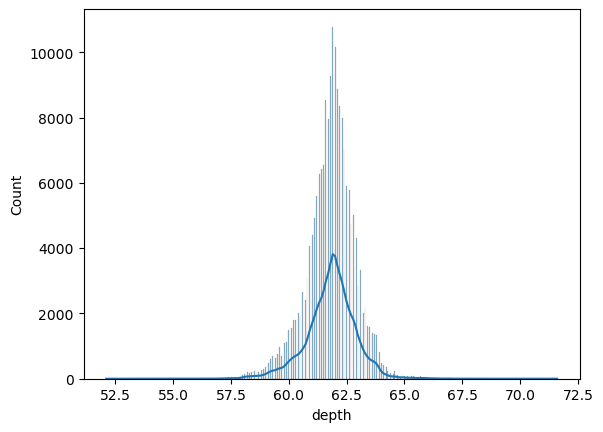

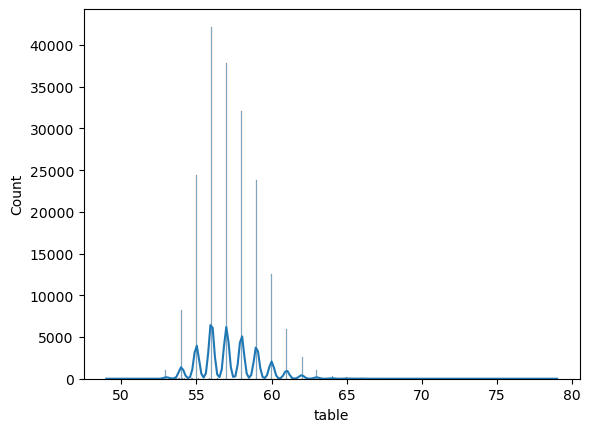

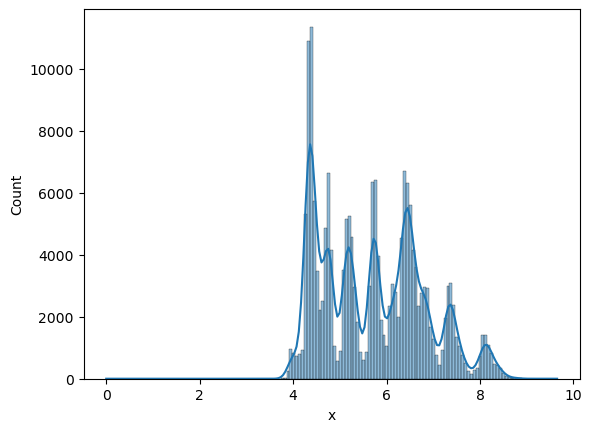

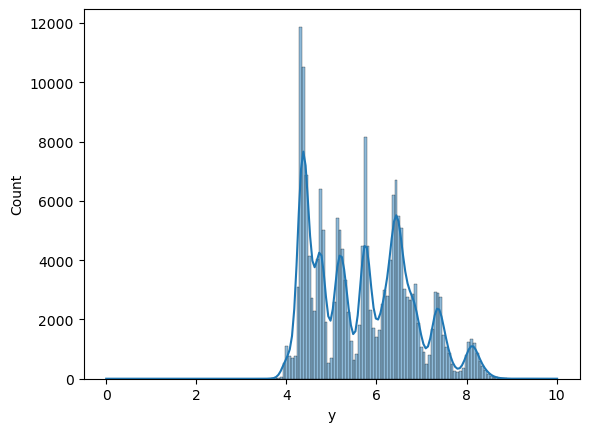

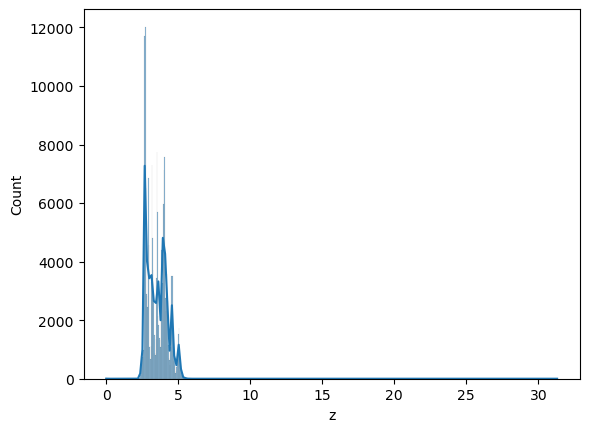

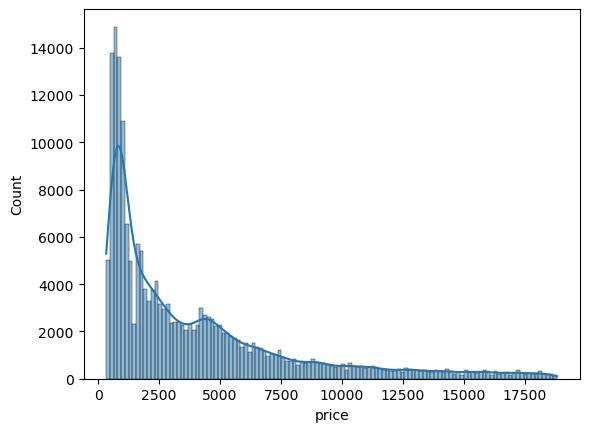

In [22]:
x=0
plt.figure(figsize=(8,6))
for i in numerical_columns:
    plt.tight_layout()
    sns.histplot(data= df ,x=i ,kde=True )
    print('\n')
    plt.show()


<Axes: >

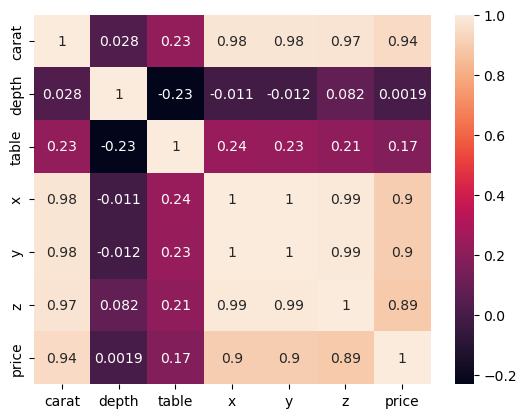

In [23]:
sns.heatmap(df[numerical_columns].corr(),annot=True)

X,Y,Z are highly correlated with carret and each other  so we need to drop them 

In [24]:
df['cut'].unique()
df['clarity'].unique()
df['color'].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [25]:
# from domain website 
cut_map = {'Fair':1,'Good':2,'Very Good':3,'Premium':4,'Ideal':5}
clearity_map = {'VS2':4, 'SI2':2, 'VS1':5, 'SI1':3, 'IF':8, 'VVS2':6, 'VVS1':7, 'I1':1}
colour_map = {'F':3, 'J':7, 'G':4, 'E':2, 'D':1, 'H':5, 'I':6}

In [26]:
df['cut'] = df['cut'].map(cut_map)
df['clarity']= df['clarity'].map(clearity_map)
df['color'] = df['color'].map(colour_map)

In [27]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453


In [28]:
# model training 

In [35]:
X = df.drop(labels=['price'],axis=1)

In [36]:
y = df[['price']]